In [29]:
import tensorflow
print(tensorflow.version.VERSION)

2.1.0


# Loading dataset
MNIST dataset, which contains 70000 28x28 grayscale images with 10 different classes. Keras splits it in a training set with 60000 instances and a testing set with 10000 instances.

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


# Anatomy of MNIST dataset

In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shpae : (10000,)


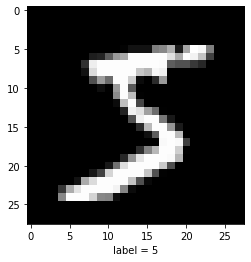

In [3]:
# plot some data
from matplotlib import pyplot as plt

image = x_train[0] 
label = y_train[0]
plt.imshow(image, cmap='gray')
plt.xlabel('label = {}'.format(label))
plt.show()

In [5]:
# print(x_train[0])

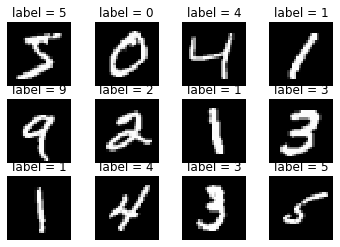

In [4]:
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
# plt.tight_layout()   # automatic padding between subplots
# plt.savefig('images/mnist_plot.png')
plt.show()

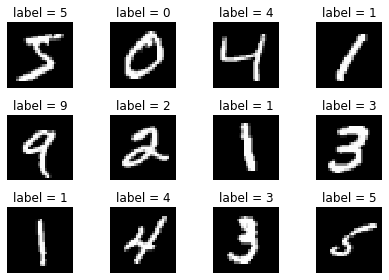

In [5]:
#same plot with plt.tight_layout
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
# plt.savefig('images/mnist_plot.png')
plt.show()

# Data normalization

In [6]:
# do some preprocessing on data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
print('after preprocess new shape of data:')
print('-' * 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

after preprocess new shape of data:
-----------------------------------
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape : (10000, 28, 28, 1)
y_test shpae : (10000,)


In [12]:
# print(x_train[0])

# Creating model
## Creating a model with the sequential API

The easiest way of creating a model in Keras is by using the sequential API, which lets you stack one layer after the other. The problem with the sequential API is that it doesn’t allow models to have multiple inputs or outputs, which are needed for some problems.

Nevertheless, the sequential API is a perfect choice for most problems.

To create a convolutional neural network we only need to create a Sequential object and use the add function to add layers.


In [9]:
import os 
os.environ['TF_CPP_LOG_LEVEL'] = "1" # ignore tensorflow worning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

The sequential API also supports another syntax where the layers are passed to the constructor directly.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

# Creating a model with the Functional API

Alternatively, the functional API allows you to create the same models but offers you more flexibility at the cost of simplicity and readability.

It can be used with multiple input and output layers as well as shared layers, which enables you to build really complex network structures.

When using the functional API we always need to pass the previous layer to the current layer. It also requires the use of an input layer.


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

# Compile a model

Before we can start training our model we need to configure the learning process. For this, we need to specify an optimizer, a loss function and optionally some metrics like accuracy.

The loss function is a measure on how good our model is at achieving the given objective.

An optimizer is used to minimize the loss(objective) function by updating the weights using the gradients


In [13]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          36928 

# Train or Fit model

In [15]:
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.1999 - accuracy: 0.9375
Epoch 2/5
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.0700 - accuracy: 0.9792
Epoch 3/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.0556 - accuracy: 0.9831
Epoch 4/5
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0479 - accuracy: 0.9863
Epoch 5/5
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.0429 - accuracy: 0.9877


# Evaluating Mode
Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 256us/sample - loss: 0.0217 - accuracy: 0.9938


[0.021737489337047736, 0.9938]

# Visualizing the training process
We can visualize our training and testing accuracy and loss for each epoch so we can get intuition about the performance of our model. The accuracy and loss over epochs are saved in the history variable we got whilst training and we will use Matplotlib to visualize this data

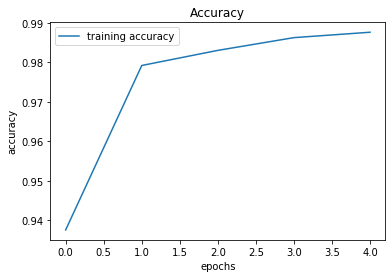

In [18]:
plt.plot(history.history['accuracy'], label='training accuracy')
# plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

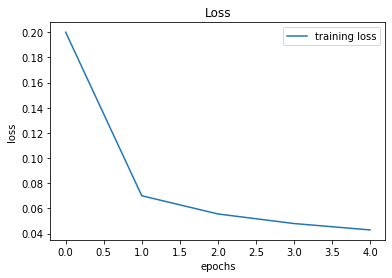

In [19]:
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [20]:
import os

model_name = 'mnist_clf.h5'
model.save(model_name)
# print('model saved to', os.getcwd())
# !ls -ltr

In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model(model_name)
# model.summary()
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          36928 

# Test a single image

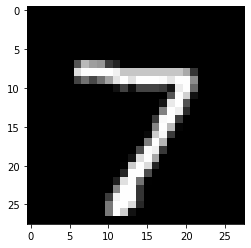

In [23]:
image_index = 0 # 4444
test_image = x_test[image_index].reshape(28, 28)
plt.imshow(test_image, cmap='gray')

In [24]:
test_image = test_image.reshape(1, 28, 28, 1) # make image batch

pred = loaded_model.predict(test_image)       # prediction

print('pred lenght:', len(pred[0]))
best_prediction = pred.argmax()
print('best_prediction', best_prediction)

pred lenght: 10
best_prediction 7


# Hard Sampe for recognition

In [25]:
import numpy as np

def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=5):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Showing max 5 first failures. The predicted class is shown first and the correct class in parenthesis.


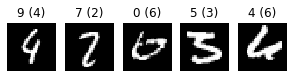

In [26]:
predictions = loaded_model.predict(x_test)

show_failures(predictions)

Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


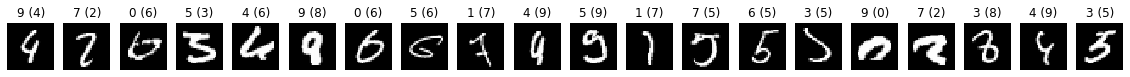

In [27]:
# predictions = loaded_model.predict(x_test)

show_failures(predictions, maxtoshow=20)